In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults 
from statsmodels.tsa.stattools import adfuller

In [2]:
Brazil_tourism_jobs = pd.read_csv('brazil_tourism_jobs.csv')

In [156]:
Rio_tourism_jobs = Brazil_tourism_jobs[Brazil_tourism_jobs['state']== 'Rio de Janeiro']
Rio_tourism_jobs.head()


,year,month,region,state,job_type,jobs
176,2006,1,Sudeste,Rio de Janeiro,Alojamento,22363
177,2006,1,Sudeste,Rio de Janeiro,Alimentação,27926
178,2006,1,Sudeste,Rio de Janeiro,Transporte Terrestre,29826
179,2006,1,Sudeste,Rio de Janeiro,Transporte Aquaviário,1597
180,2006,1,Sudeste,Rio de Janeiro,Transporte Aéreo,6204


In [6]:
years = Rio_tourism_jobs['year'].unique()
months = Rio_tourism_jobs['month'].unique()
total_jobs_rio = [0]*(len(years)*len(months))

for i in range(0,len(years)):
    for j in range(0,len(months)):
        month_year = Rio_tourism_jobs[(Rio_tourism_jobs['year'] == years[i]) & (Rio_tourism_jobs['month'] == months[j])]
        total_jobs_rio[i*12 + j] = month_year['jobs'].sum()
        

Text(0.5, 1.0, 'Rio Tourism Jobs by month since 2006')

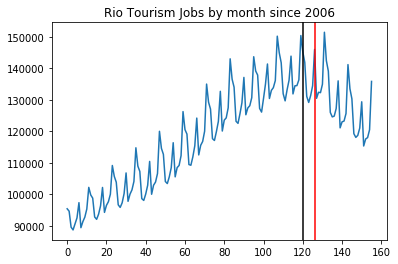

In [7]:
plt.plot(total_jobs_rio)
plt.axvline(x=126,color='r')
plt.axvline(x=120,color = 'k')
plt.title('Rio Tourism Jobs by month since 2006')

In [8]:

years = Brazil_tourism_jobs['year'].unique()
months = Brazil_tourism_jobs['month'].unique()
total_jobs_brazil = [0]*(len(years)*len(months))

for i in range(0,len(years)):
    for j in range(0,len(months)):
        month_year = Brazil_tourism_jobs[(Brazil_tourism_jobs['year'] == years[i]) & (Brazil_tourism_jobs['month'] == months[j])]
        total_jobs_brazil[i*12 + j] = month_year['jobs'].sum()

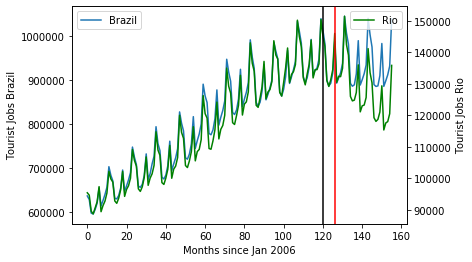

In [176]:
ax = plt.subplot()
ax2=ax.twinx()
ax.plot(total_jobs_brazil,label = 'Brazil')
ax2.plot(total_jobs_rio,color = 'g',label = 'Rio')
ax.set_ylabel('Tourist Jobs Brazil')
ax2.set_ylabel('Tourist Jobs Rio')
ax.set_xlabel('Months since Jan 2006')
plt.axvline(x=126,color='r')
plt.axvline(x=120,color = 'k')
ax.legend()
ax2.legend()

#plt.title('Brazil and Rio Tourism Jobs by month since 2006')
plt.savefig('Brazil_and_Rio_Tourism_Jobs.png',bbox_inches ='tight')


In [10]:
Base_level_Brazil = total_jobs_brazil[119]
Base_level_Rio = total_jobs_rio[119]

n = len(total_jobs_brazil) - 119

Percent_change_brazil = [0]*n
Percent_change_rio = [0]*n

for i in range(0,n):
    Percent_change_brazil[i] = (total_jobs_brazil[119+i] - Base_level_Brazil)/Base_level_Brazil
    Percent_change_rio[i] = (total_jobs_rio[119+i] - Base_level_Rio)/Base_level_Rio


Text(0.5, 1.0, 'Brazil and Rio % change in Tourism Jobs since Jan 2016 peak')

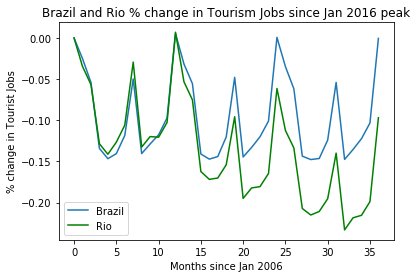

In [11]:
ax = plt.subplot()

ax.plot(Percent_change_brazil,label = 'Brazil')
ax.plot(Percent_change_rio,color = 'g',label = 'Rio')
ax.set_ylabel('% change in Tourist Jobs')
ax.set_xlabel('Months since Jan 2006')
ax.legend()


plt.title('Brazil and Rio % change in Tourism Jobs since Jan 2016 peak')



Text(0.5, 1.0, 'Brazil and Rio % change in Tourism Jobs since Jan 2016 peak')

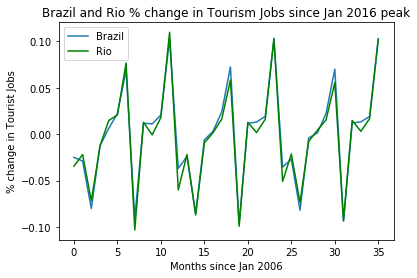

In [12]:
Diff_Percent_change_brazil = np.diff(Percent_change_brazil)
Diff_Percent_change_rio = np.diff(Percent_change_rio)

ax = plt.subplot()

ax.plot(Diff_Percent_change_brazil,label = 'Brazil')
ax.plot(Diff_Percent_change_rio,color = 'g',label = 'Rio')
ax.set_ylabel('% change in Tourist Jobs')
ax.set_xlabel('Months since Jan 2006')
ax.legend()


plt.title('Brazil and Rio % change in Tourism Jobs since Jan 2016 peak')



Now we will look at Tourism employment overlapped with international arrivals


In [79]:
Brazil_arrivals = pd.read_csv('brazil_international_arrivals.csv')
Brazil_arrivals.head()
years = Brazil_arrivals['year'].unique()
months = Brazil_arrivals['month'].unique()
for i in range(0,len(Brazil_arrivals)):
    if type(Brazil_arrivals['value'].iloc[i]) == str:
        Brazil_arrivals.loc[i,'value'] = Brazil_arrivals['value'].iloc[i].replace(',','',1)
    

Brazil_arrivals['value'].fillna(0,inplace=True)


In [109]:
Total_tourists = [0] * (len(years)*len(months))
Brazil_arrivals['value'] = Brazil_arrivals['value'].astype('float64')
for i in range(0,len(years)):
    for j in range(0,len(months)):
        Temp = Brazil_arrivals[(Brazil_arrivals['year'] == years[i]) & (Brazil_arrivals['month'] == months[j])]
        Total_tourists[i*len(months)+j] = Temp['value'].sum()
      

Text(0.5, 1.0, 'Brazil Tourism Jobs and international arrivals by month since 2006')

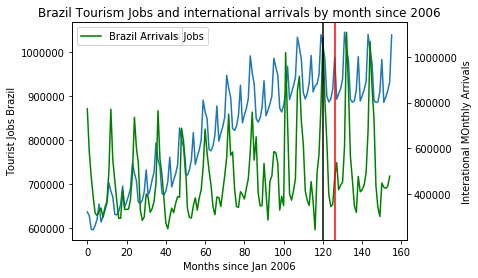

In [112]:

ax = plt.subplot()
ax2=ax.twinx()
ax.plot(total_jobs_brazil,label = 'Brazil Tourism Jobs')
ax2.plot(Total_tourists[-156:-1],color = 'g',label = 'Brazil Arrivals')
ax.set_ylabel('Tourist Jobs Brazil')
ax2.set_ylabel('Interational Monthly Arrivals')
ax.set_xlabel('Months since Jan 2006')
plt.axvline(x=126,color='r')
plt.axvline(x=120,color = 'k')
ax.legend()
ax2.legend()

plt.title('Brazil Tourism Jobs and international arrivals by month since 2006')

In [123]:
np.corrcoef(total_jobs_brazil,Total_tourists[-157:-1])

array([[1.        , 0.29339496],
       [0.29339496, 1.        ]])

In [148]:
def de_season(series,season):
    de_seasoned = [0] * (len(series) - season)
    for i in range(season,len(series)):
        de_seasoned[i-season] = (series[i] - series[i-season]) 
    
    return de_seasoned

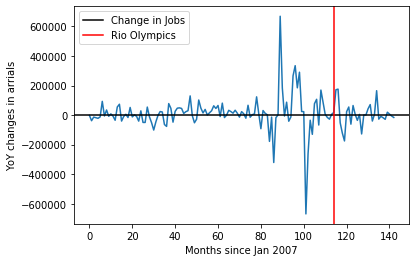

In [183]:
Arrivals_yoy = de_season(Total_tourists[-156:-1],12)

ax = plt.subplot()
ax.plot(Arrivals_yoy)
ax.axhline(y=0,color ='k',label = 'Change in Jobs')
ax.axvline(x=114,color='r',label = 'Rio Olympics')
ax.set_ylabel('YoY changes in arrials')
ax.set_xlabel('Months since Jan 2007')
ax.legend()

#plt.title('Brazil International Arrivals - YoY Change')
plt.savefig('Brazil_Arrivals_deseasoned',bbox_inches ='tight')

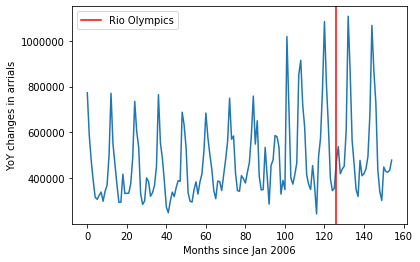

In [184]:
ax = plt.subplot()
ax.plot(Total_tourists[-156:-1])
ax.axvline(x=126,color='r',label = 'Rio Olympics')
ax.set_ylabel('YoY changes in arrials')
ax.set_xlabel('Months since Jan 2006')
ax.legend()

#plt.title('Brazil International Arrivals - Monthly')
plt.savefig('Brazil_Arrivals',bbox_inches ='tight')